<a href="https://colab.research.google.com/github/thellamsneha13/sneha-thellam-repository/blob/main/Sneha_Chennai_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries










In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set_style('dark')
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import xgboost as xg
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from scipy.stats import pearsonr
from scipy import stats
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
url='https://raw.githubusercontent.com/Praveen3ravi/PROJECT/main/train-chennai-sale.csv'
df = pd.read_csv(url)
df.head(3)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,SALE_YEAR,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,INF_PRICE,NO. YEARS PASSED_FROM_SALE(2022-SALE_YEAR),1+0.04,"POWER(Z,Y)",CURRENT YEAR
0,P09411,Anna Nagar,1986,19-12-2006,2006,2.0,1.0,5,Ab Normal,No,...,2.5,3.765,760122,304049,21717770,40676975.91,16,1.04,1.872981,2022
1,P05346,Velachery,1855,13-03-2010,2010,3.0,2.0,5,Family,No,...,3.6,4.010,356321,77042,9630290,15418404.56,12,1.04,1.601032,2022
2,P00219,Chrompet,1220,11-09-2014,2014,2.0,1.0,4,Partial,No,...,3.1,3.320,409027,198316,12394750,16963071.24,8,1.04,1.368569,2022


## Description of data

In [ ]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'SALE_YEAR', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILD_YEAR', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE',
       'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE',
       'COMMIS', 'SALES_PRICE', 'INF_PRICE',
       'NO. YEARS PASSED_FROM_SALE(2022-SALE_YEAR)', '1+0.04', 'POWER(Z,Y)',
       'CURRENT YEAR'],
      dtype='object')

In [ ]:
df.dtypes

PRT_ID                                         object
AREA                                           object
INT_SQFT                                        int64
DATE_SALE                                      object
SALE_YEAR                                       int64
N_BEDROOM                                     float64
N_BATHROOM                                    float64
N_ROOM                                          int64
SALE_COND                                      object
PARK_FACIL                                     object
DATE_BUILD                                     object
BUILD_YEAR                                      int64
BUILDTYPE                                      object
UTILITY_AVAIL                                  object
STREET                                         object
MZZONE                                         object
QS_ROOMS                                      float64
QS_BATHROOM                                   float64
QS_BEDROOM                  

In [ ]:
#Checking for outliers
df.describe()

,INT_SQFT,SALE_YEAR,N_BEDROOM,N_BATHROOM,N_ROOM,BUILD_YEAR,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,INF_PRICE,NO. YEARS PASSED_FROM_SALE(2022-SALE_YEAR),1+0.04,"POWER(Z,Y)",CURRENT YEAR
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03,7.109000e+03,7109.000000,7.109000e+03,7109.000000,7109.0
mean,1382.073006,2009.768181,1.637029,1.213260,3.688704,1985.491912,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07,1.767201e+07,12.231819,1.040000e+00,1.621739,2022.0
std,457.410902,2.205979,0.802902,0.409639,1.019099,12.648859,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06,6.310658e+06,2.205979,3.330903e-14,0.141455,0.0
min,500.000000,2004.000000,1.000000,1.000000,2.000000,1949.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06,3.591355e+06,7.000000,1.040000e+00,1.315932,2022.0
25%,993.000000,2008.000000,1.000000,1.000000,3.000000,1976.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06,1.323023e+07,11.000000,1.040000e+00,1.539454,2022.0
50%,1373.000000,2010.000000,1.000000,1.000000,4.000000,1986.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07,1.687515e+07,12.000000,1.040000e+00,1.601032,2022.0
75%,1744.000000,2011.000000,2.000000,1.000000,4.000000,1996.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07,2.098167e+07,14.000000,1.040000e+00,1.731676,2022.0
max,2500.000000,2015.000000,4.000000,2.000000,6.000000,2010.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07,4.354230e+07,18.000000,1.040000e+00,2.025817,2022.0


In [ ]:
df.shape

(7109, 28)

## CREATING NEW FEATURES FOR DATE_SALE & DATE_BUILD.

In [ ]:
df['DATE_SALE']=pd.to_datetime(df['DATE_SALE'])
df['DATE_BUILD']=pd.to_datetime(df['DATE_BUILD'])
df['BUILD_YEAR'] = df['DATE_BUILD'].dt.year
df['SALE_YEAR'] = df['DATE_SALE'].dt.year
df["SOLD_AGE"]=df['SALE_YEAR']-df['BUILD_YEAR']

In [ ]:
df.head(2)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,SALE_YEAR,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,INF_PRICE,NO. YEARS PASSED_FROM_SALE(2022-SALE_YEAR),1+0.04,"POWER(Z,Y)",CURRENT YEAR,SOLD_AGE
0,P09411,Anna Nagar,1986,2006-12-19,2006,2.0,1.0,5,Ab Normal,No,...,3.765,760122,304049,21717770,40676975.91,16,1.04,1.872981,2022,11
1,P05346,Velachery,1855,2010-03-13,2010,3.0,2.0,5,Family,No,...,4.010,356321,77042,9630290,15418404.56,12,1.04,1.601032,2022,22


## DROPPING UNWANTED FEATURES.

In [ ]:
df=df.drop(['PRT_ID','REG_FEE','COMMIS','DATE_SALE','DATE_BUILD','NO. YEARS PASSED_FROM_SALE(2022-SALE_YEAR)','1+0.04','POWER(Z,Y)','CURRENT YEAR'],axis=1)

In [ ]:
df.head(3)

,AREA,INT_SQFT,SALE_YEAR,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILD_YEAR,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,INF_PRICE,SOLD_AGE
0,Anna Nagar,1986,2006,2.0,1.0,5,Ab Normal,No,1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,40676975.91,11
1,Velachery,1855,2010,3.0,2.0,5,Family,No,1988,Others,NoSewer,Paved,I,4.7,3.9,3.6,4.010,9630290,15418404.56,22
2,Chrompet,1220,2014,2.0,1.0,4,Partial,No,2009,Commercial,NoSewer,No Access,RH,4.5,2.6,3.1,3.320,12394750,16963071.24,5


## FILLING THE NULL VALUES

In [ ]:
#checkiing the null values in the overall dataframe
pd.DataFrame(df.isnull().sum()).T

,AREA,INT_SQFT,SALE_YEAR,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILD_YEAR,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,INF_PRICE,SOLD_AGE
0,0,0,0,1,5,0,0,0,0,0,0,0,0,0,0,0,48,0,0,0


In [ ]:
# imputing the values with respective methods
df['N_BEDROOM']=np.floor(df['N_BEDROOM'].fillna(df['N_BEDROOM'].mean()))
df['N_BATHROOM']=np.floor(df['N_BATHROOM'].fillna(df['N_BATHROOM'].mean()))
df['QS_OVERALL']=df['QS_OVERALL'].fillna(df['QS_OVERALL'].mean())

In [ ]:
#checkiing the null values in the overall dataframe
pd.DataFrame(df.isnull().sum()).T

,AREA,INT_SQFT,SALE_YEAR,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILD_YEAR,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,INF_PRICE,SOLD_AGE
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## DISTINCT COUNT OF EACH COLUMNS

In [ ]:
print("Unique area counts : : ",df['AREA'].unique())

Unique area counts : :  ['Anna Nagar' 'Velachery' 'Chrompet' 'KK Nagar' 'T Nagar' 'Adyar'
 'Karapakkam']


In [ ]:
print("count of areas : : \n",df['AREA'].value_counts())

count of areas : : 
 Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64


In [ ]:
print("count of N_BEDROOM : : \n",df['N_BEDROOM'].value_counts() )

count of N_BEDROOM : : 
 1.0    3796
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64


In [ ]:
print("count of N_BATHROOM : : \n",df['N_BATHROOM'].value_counts())

count of N_BATHROOM : : 
 1.0    5594
2.0    1515
Name: N_BATHROOM, dtype: int64


In [ ]:
print("count of QS_OVERALL : : \n",df['QS_OVERALL'].value_counts())

count of QS_OVERALL : : 
 3.540    59
3.260    57
3.320    56
3.560    55
3.360    54
         ..
4.810     1
2.465     1
2.335     1
4.765     1
3.245     1
Name: QS_OVERALL, Length: 480, dtype: int64


In [ ]:
print("count of SALE_COND : : \n",df['SALE_COND'].value_counts())

count of SALE_COND : : 
 Adj Land       1439
Partial        1433
Normal Sale    1423
Ab Normal      1411
Family         1403
Name: SALE_COND, dtype: int64


In [ ]:
print("unique of SALE_COND : : \n",df['SALE_COND'].unique())

unique of SALE_COND : : 
 ['Ab Normal' 'Family' 'Partial' 'Adj Land' 'Normal Sale']


In [ ]:
print("count of PARK_FACIL : : \n",df['PARK_FACIL'].value_counts())

count of PARK_FACIL : : 
 Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64


In [ ]:
print("unique of PARK_FACIL : : \n",df['PARK_FACIL'].unique())

unique of PARK_FACIL : : 
 ['No' 'Yes']


In [ ]:
print("unique of SOLD_AGE : : \n",df['SOLD_AGE'].unique())

unique of SOLD_AGE : : 
 [11 22  5 28 10 34 15 37 19 54  9 16 35  6 27 40 36 18 29 49 30 31 39 25
 44 33 43 13 14  4  8 26 23 38 20 32 24 50 46 17 21 41 12 55  7 45 47 48
 42 53 51 52  3]


In [ ]:
print("unique of UTILITY_AVAIL : : \n",df['UTILITY_AVAIL'].unique())

unique of UTILITY_AVAIL : : 
 ['AllPub' 'NoSewer ' 'ELO']


In [ ]:
print("count of UTILITY_AVAIL : : \n",df['UTILITY_AVAIL'].value_counts())

count of UTILITY_AVAIL : : 
 NoSewer     3700
AllPub      1887
ELO         1522
Name: UTILITY_AVAIL, dtype: int64


In [ ]:
print("unique of STREET : : \n",df['STREET'].unique())

unique of STREET : : 
 ['Gravel' 'Paved' 'No Access']


In [ ]:
print("count of STREET : : \n",df['STREET'].value_counts())

count of STREET : : 
 Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64


## SPELLING CORRECTIONS.

In [ ]:
#replacing the spelling mistakes in PARK_FACIL column
df['PARK_FACIL'].replace(['Noo'],['No'],inplace=True)

#replacing the spelling mistakes in STREET column
df['STREET'].replace(['Pavd','NoAccess'],['Paved','No Access'],inplace=True)

#replacing the spelling mistakes in UTILITY_AVAIL column
df['UTILITY_AVAIL'].replace(['NoSewr ','NoSeWa','All Pub'],['No Sewer','No Sewer','AllPub'],inplace=True)

#replacing the spelling mistakes in BUILDTYPE column
df['BUILDTYPE'].replace(['Comercial','Other'],['Commercial','Others'],inplace=True)

#replacing the spelling mistakes in SALE_COND column
df['SALE_COND'].replace(['Ab Normal','Partiall','PartiaLl','Adj Land'],['AbNormal','Partial','Partial','AdjLand'],inplace=True)

#replacing the spelling mistakes in AREA column
df['AREA'].replace(['Ana Nagar','Ann Nagar','Karapakam','Chrompt','Chrmpet','Chormpet','Adyr','Velchery','KKNagar','TNagar'],
['Anna Nagar','Anna Nagar','Karapakkam','Chrompet','Chrompet','Chrompet','Adyar','Velachery','KK Nagar','T Nagar'],
inplace=True)

In [ ]:
df.head(3)

,AREA,INT_SQFT,SALE_YEAR,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILD_YEAR,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,INF_PRICE,SOLD_AGE
0,Anna Nagar,1986,2006,2.0,1.0,5,AbNormal,No,1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,40676975.91,11
1,Velachery,1855,2010,3.0,2.0,5,Family,No,1988,Others,NoSewer,Paved,I,4.7,3.9,3.6,4.010,9630290,15418404.56,22
2,Chrompet,1220,2014,2.0,1.0,4,Partial,No,2009,Commercial,NoSewer,No Access,RH,4.5,2.6,3.1,3.320,12394750,16963071.24,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   object 
 1   INT_SQFT       7109 non-null   int64  
 2   SALE_YEAR      7109 non-null   int64  
 3   N_BEDROOM      7109 non-null   float64
 4   N_BATHROOM     7109 non-null   float64
 5   N_ROOM         7109 non-null   int64  
 6   SALE_COND      7109 non-null   object 
 7   PARK_FACIL     7109 non-null   object 
 8   BUILD_YEAR     7109 non-null   int64  
 9   BUILDTYPE      7109 non-null   object 
 10  UTILITY_AVAIL  7109 non-null   object 
 11  STREET         7109 non-null   object 
 12  MZZONE         7109 non-null   object 
 13  QS_ROOMS       7109 non-null   float64
 14  QS_BATHROOM    7109 non-null   float64
 15  QS_BEDROOM     7109 non-null   float64
 16  QS_OVERALL     7109 non-null   float64
 17  SALES_PRICE    7109 non-null   int64  
 18  INF_PRIC

## EXPLODATORY DATA ANALYSIS (EDA)

# AREA wise plot

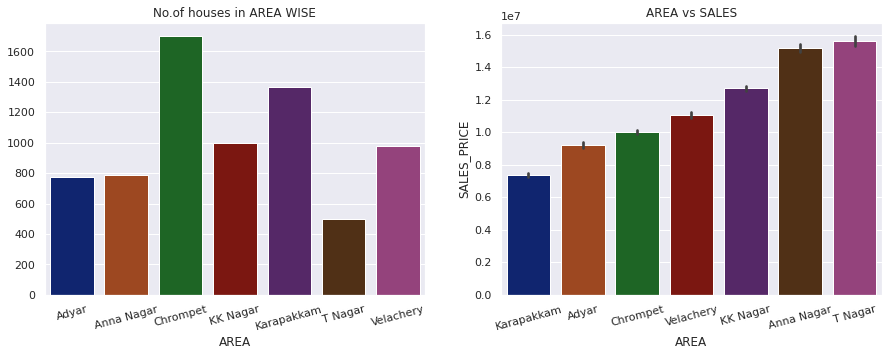

In [ ]:
A=df['AREA'].groupby(df['AREA']).count()
sns.set_theme(style="darkgrid",palette="dark")
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.barplot(x=A.index,y=A.values,data=df)
plt.xticks(rotation=15)
plt.title('No.of houses in AREA WISE')
plt.subplot(122)
sns.barplot(x='AREA',y='SALES_PRICE',data=df,order=df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])
plt.xticks(rotation=15)
plt.title('AREA vs SALES')

plt.show()


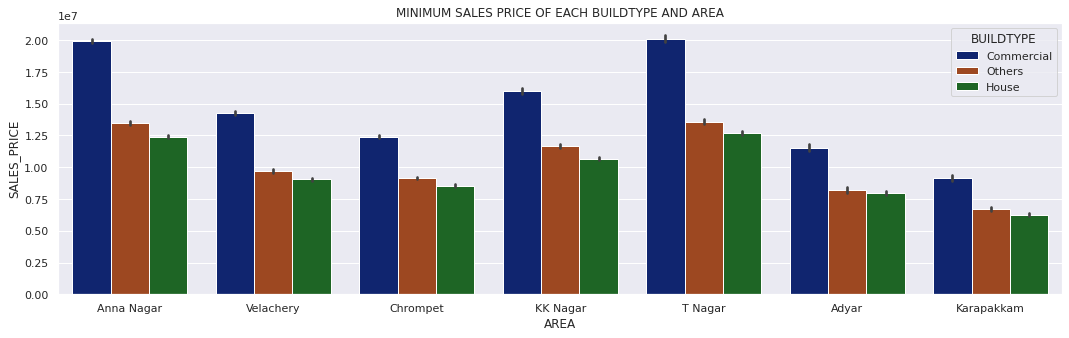

In [ ]:
plt.figure(figsize=(18,5))
sns.barplot(x='AREA',y='SALES_PRICE',data=df,hue='BUILDTYPE')
plt.title('SALES PRICE OF EACH BUILDTYPE AND AREA')
plt.show()

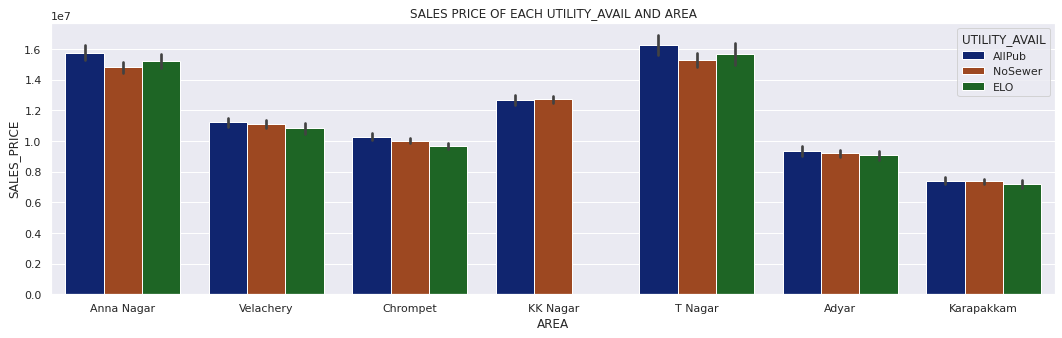

In [ ]:
plt.figure(figsize=(18,5))
sns.barplot(x='AREA',y='SALES_PRICE',data=df,hue='UTILITY_AVAIL')
plt.title('SALES PRICE OF EACH UTILITY_AVAIL AND AREA')
plt.show()

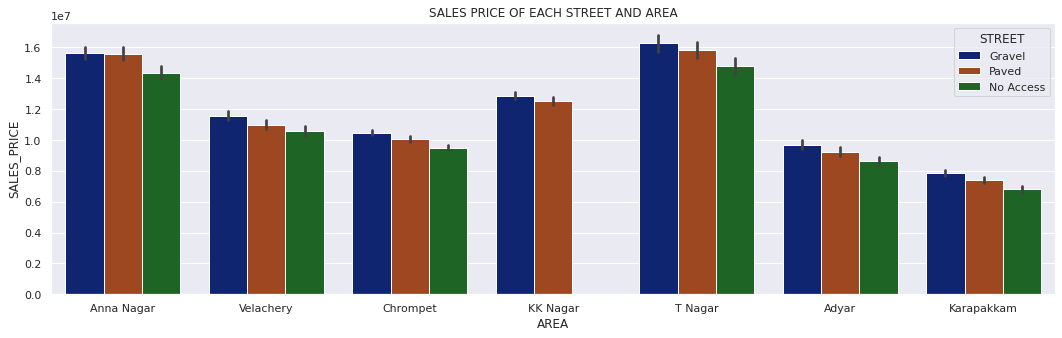

In [ ]:
plt.figure(figsize=(18,5))
sns.barplot(x='AREA',y='SALES_PRICE',data=df,hue='STREET')
plt.title('SALES PRICE OF EACH STREET AND AREA')
plt.show()

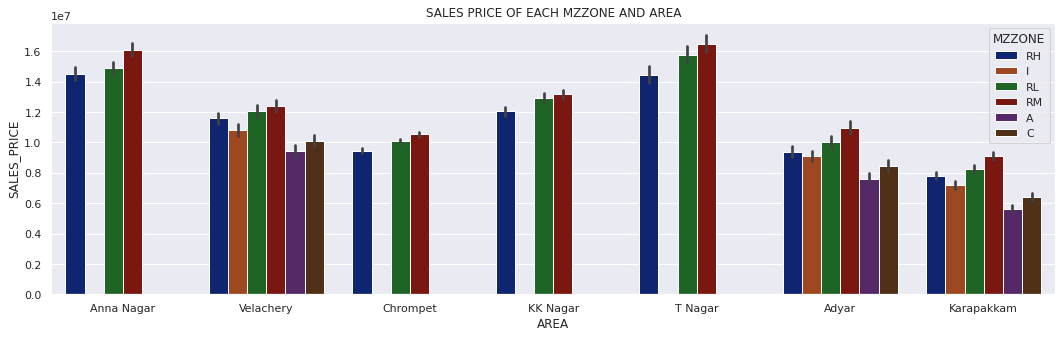

In [ ]:
plt.figure(figsize=(18,5))
sns.barplot(x='AREA',y='SALES_PRICE',data=df,hue='MZZONE')
plt.title('SALES PRICE OF EACH MZZONE AND AREA')
plt.show()

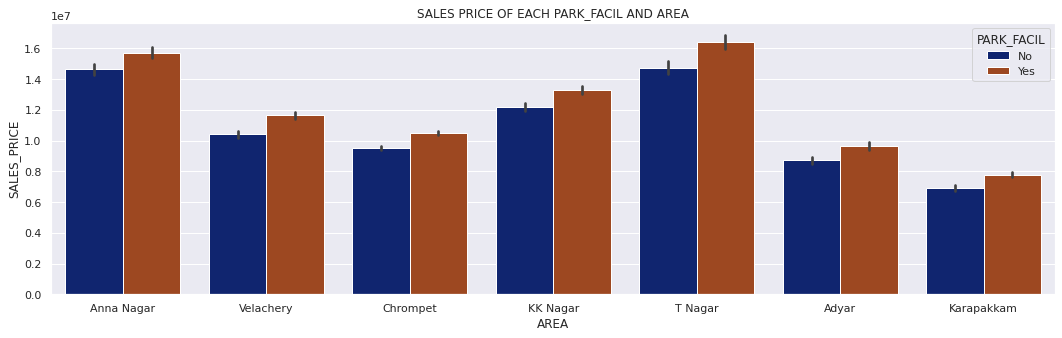

In [ ]:
plt.figure(figsize=(18,5))
sns.barplot(x='AREA',y='SALES_PRICE',data=df,hue='PARK_FACIL')
plt.title('SALES PRICE OF EACH PARK_FACIL AND AREA')
plt.show()

Based on the above graphs of Area wise. Thease are the insights i had found 


*   T-Nagar is having the highest sales with lowest number of houses. This is because of having highly commercial land with parking facilitys and all types of utility available. This T-Nagar is seperated in 3 MZzones (I,RH,RM)
*   Karapakkam is having the lowest sales with good number of houses.This is also having highly commercial land with parking facilitys and all types of utility available. This T-Nagar is seperated in 3 MZzones (I,RH,RM,RL,A,C)
*   The city Chennai is highly commercial area
*   Each area in chennai has divided in several MZZONES and having the parking facility availble in all most of all the areas
*   Chrompet is having the highest number of houses and the sales id not the highest level







## BUILDTYPE wise plot

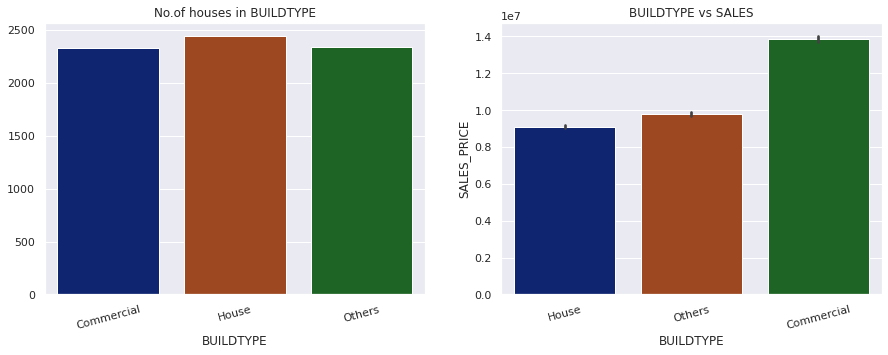

In [ ]:
B=df['BUILDTYPE'].groupby(df['BUILDTYPE']).count()

sns.set_theme(style="darkgrid",palette="dark")
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.barplot(x=B.index,y=B.values,data=df)
plt.xticks(rotation=15)
plt.title('No.of houses in BUILDTYPE')
plt.subplot(122)
sns.barplot(x='BUILDTYPE',y='SALES_PRICE',data=df,order=df.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])
plt.xticks(rotation=15)
plt.title('BUILDTYPE vs SALES')
plt.show()


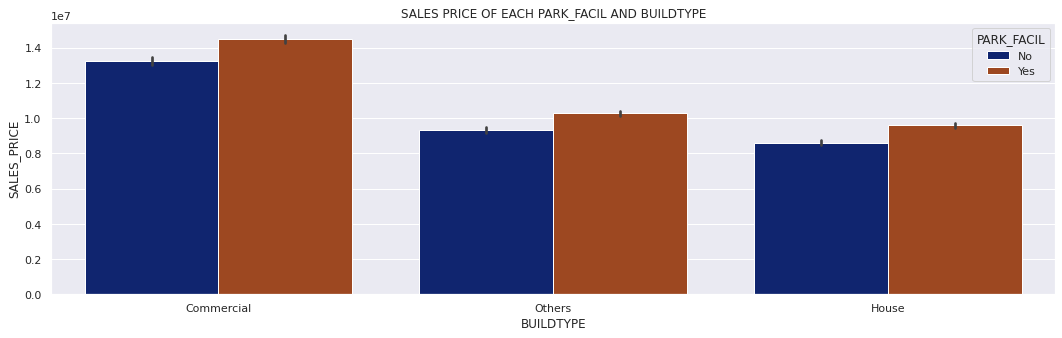

In [ ]:
plt.figure(figsize=(18,5))
sns.barplot(x='BUILDTYPE',y='SALES_PRICE',data=df,hue='PARK_FACIL')
plt.title('SALES PRICE OF EACH PARK_FACIL AND BUILDTYPE')
plt.show()

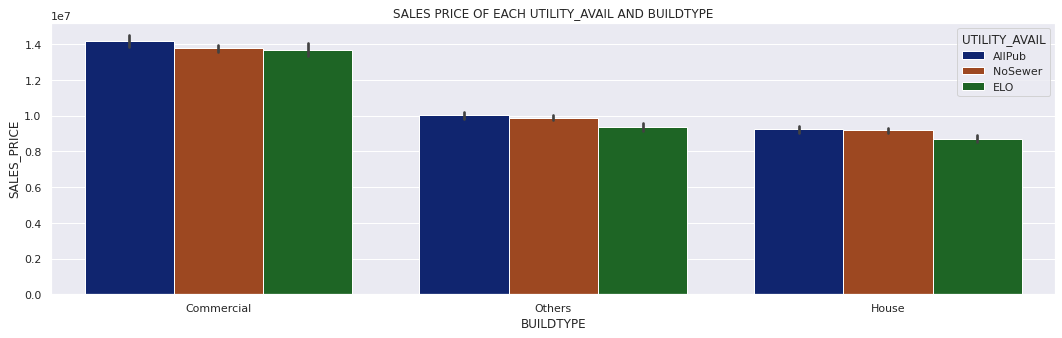

In [ ]:
plt.figure(figsize=(18,5))
sns.barplot(x='BUILDTYPE',y='SALES_PRICE',data=df,hue='UTILITY_AVAIL')
plt.title('SALES PRICE OF EACH UTILITY_AVAIL AND BUILDTYPE')
plt.show()

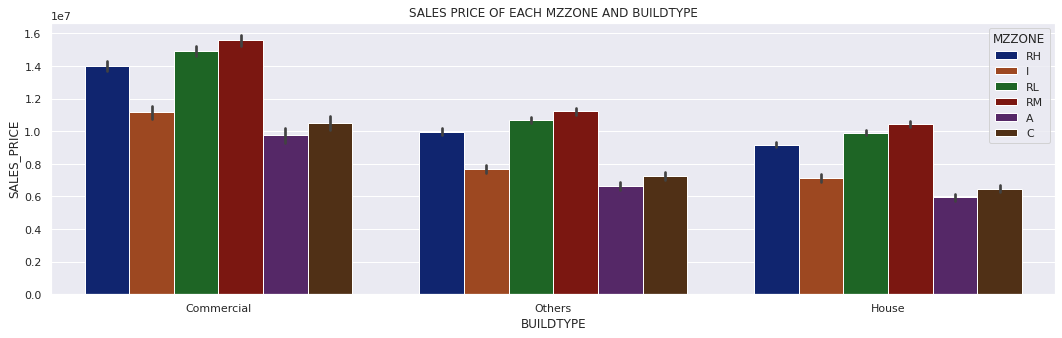

In [ ]:
plt.figure(figsize=(18,5))
sns.barplot(x='BUILDTYPE',y='SALES_PRICE',data=df,hue='MZZONE')
plt.title('SALES PRICE OF EACH MZZONE AND BUILDTYPE')
plt.show()

From the above graph is the land is belongs to commercial then the sales of that place is very high with all the facility types inclusing parking lots and with high utility facilities are availble.
All Mzzones, parking facility, utility facility are avilable in each Build type






# UTILITY_AVAIL wise plot

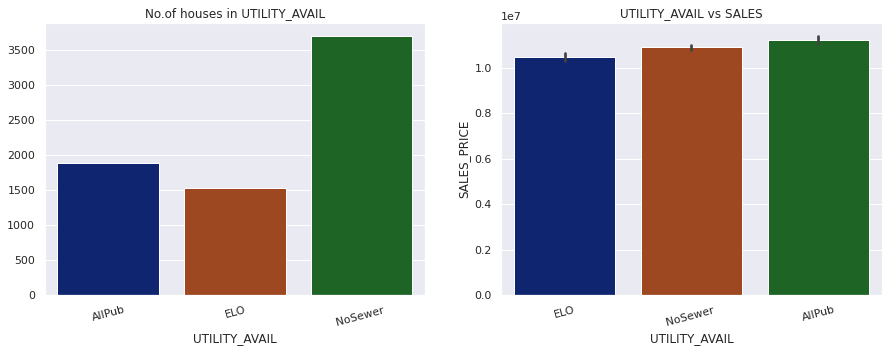

In [ ]:
C=df['UTILITY_AVAIL'].groupby(df['UTILITY_AVAIL']).count()

sns.set_theme(style="darkgrid",palette="dark")
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.barplot(x=C.index,y=C.values,data=df)
plt.xticks(rotation=15)
plt.title('No.of houses in UTILITY_AVAIL')
plt.subplot(122)
sns.barplot(x='UTILITY_AVAIL',y='SALES_PRICE',data=df,order=df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])
plt.xticks(rotation=15)
plt.title('UTILITY_AVAIL vs SALES')
plt.show()

## STREET wise plot

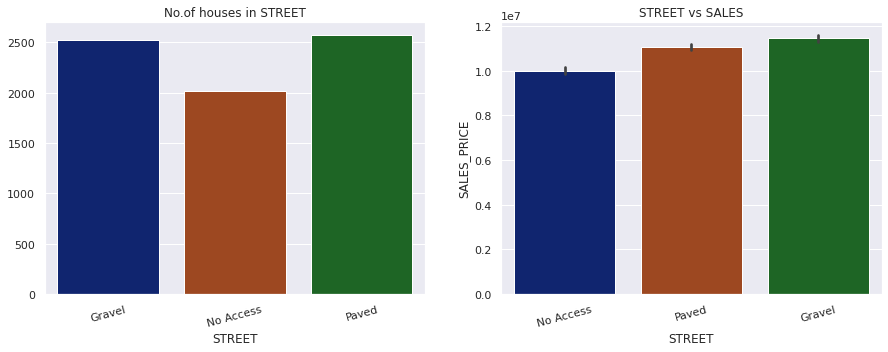

In [ ]:
D=df['STREET'].groupby(df['STREET']).count()

sns.set_theme(style="darkgrid",palette="dark")
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.barplot(x=D.index,y=D.values,data=df)
plt.xticks(rotation=15)
plt.title('No.of houses in STREET')
plt.subplot(122)
sns.barplot(x='STREET',y='SALES_PRICE',data=df,order=df.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])
plt.xticks(rotation=15)
plt.title('STREET vs SALES')
plt.show()

## MZZONE wise plot

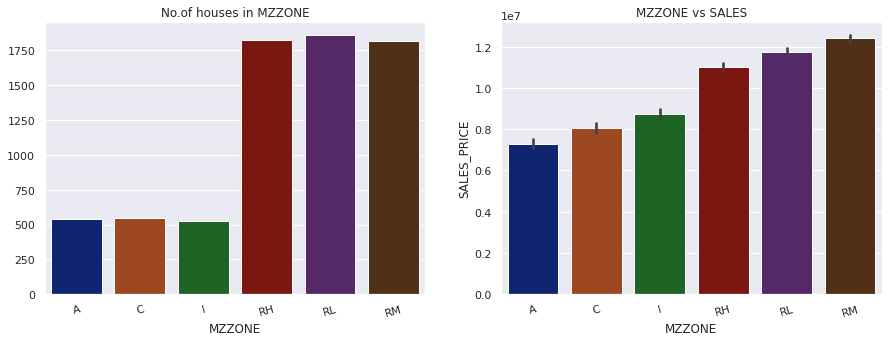

In [ ]:
E=df['MZZONE'].groupby(df['MZZONE']).count()

sns.set_theme(style="darkgrid",palette="dark")
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.barplot(x=E.index,y=E.values,data=df)
plt.xticks(rotation=15)
plt.title('No.of houses in MZZONE')
plt.subplot(122)
sns.barplot(x='MZZONE',y='SALES_PRICE',data=df,order=df.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])
plt.xticks(rotation=15)
plt.title('MZZONE vs SALES')
plt.show()

from the above bar grapg the highest sales are in RM(Residential Medium Density)

*   A - Agriculture
*   C - Commercial
*   RH - Residential High Density
*   RM - Residential Medium Density
*   RL - Residential Low Density
*   I - Industrial 










## PARK_FACIL wise plot

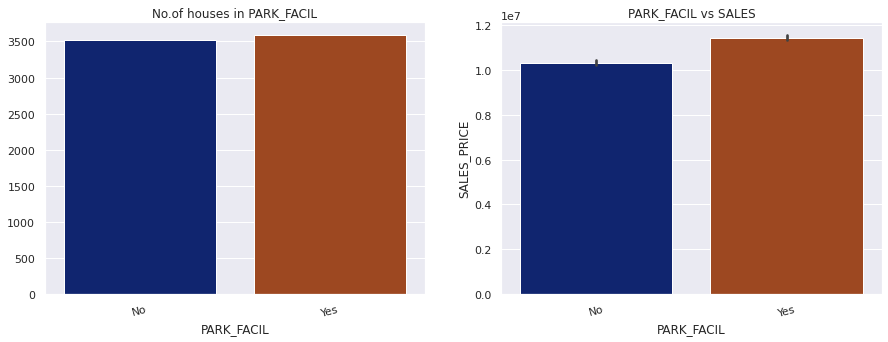

In [ ]:
F=df['PARK_FACIL'].groupby(df['PARK_FACIL']).count()

sns.set_theme(style="darkgrid",palette="dark")
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.barplot(x=F.index,y=F.values,data=df)
plt.xticks(rotation=15)
plt.title('No.of houses in PARK_FACIL')
plt.subplot(122)
sns.barplot(x='PARK_FACIL',y='SALES_PRICE',data=df,order=df.groupby('PARK_FACIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['PARK_FACIL'])
plt.xticks(rotation=15)
plt.title('PARK_FACIL vs SALES')
plt.show()

from the above graph the most of the Chennai houses are having the parking facility. If the parking facility is availble then the sales is also high. 

In [ ]:
df.head(3)

,AREA,INT_SQFT,SALE_YEAR,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILD_YEAR,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,INF_PRICE,SOLD_AGE
0,Anna Nagar,1986,2006,2.0,1.0,5,AbNormal,No,1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,40676975.91,11
1,Velachery,1855,2010,3.0,2.0,5,Family,No,1988,Others,NoSewer,Paved,I,4.7,3.9,3.6,4.010,9630290,15418404.56,22
2,Chrompet,1220,2014,2.0,1.0,4,Partial,No,2009,Commercial,NoSewer,No Access,RH,4.5,2.6,3.1,3.320,12394750,16963071.24,5


In [ ]:
df.dtypes

AREA              object
INT_SQFT           int64
SALE_YEAR          int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILD_YEAR         int64
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
SALES_PRICE        int64
INF_PRICE        float64
SOLD_AGE           int64
dtype: object

## ENCODING THE CATEGORICAL FEATURES.

In [ ]:
pd.DataFrame(df.dtypes.value_counts())

,0
object,7
float64,7
int64,6


In [ ]:
df['PARK_FACIL']=le.fit_transform(df['PARK_FACIL'])
df['AREA']=le.fit_transform(df['AREA'])
df['BUILDTYPE']=le.fit_transform(df['BUILDTYPE'])
df['SALE_COND']=le.fit_transform(df['SALE_COND'])
df['UTILITY_AVAIL']=le.fit_transform(df['UTILITY_AVAIL'])
df['STREET']=le.fit_transform(df['STREET'])
df['MZZONE']=le.fit_transform(df['MZZONE'])

In [ ]:
df.head()

,AREA,INT_SQFT,SALE_YEAR,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILD_YEAR,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,INF_PRICE,SOLD_AGE
0,1,1986,2006,2.0,1.0,5,0,0,1995,0,0,0,3,4.9,4.2,2.5,3.765,21717770,40676975.91,11
1,6,1855,2010,3.0,2.0,5,2,0,1988,2,2,2,2,4.7,3.9,3.6,4.010,9630290,15418404.56,22
2,2,1220,2014,2.0,1.0,4,4,0,2009,0,2,1,3,4.5,2.6,3.1,3.320,12394750,16963071.24,5
3,2,1167,2007,1.0,1.0,3,4,0,1979,2,0,1,4,3.6,2.1,2.5,2.670,8488790,15287831.22,28
4,6,1847,2006,3.0,2.0,5,2,0,1996,0,0,0,5,2.4,4.5,2.1,3.260,16800250,31466553.17,10


## FEATURE IMPORTANCE

In [ ]:
#prepating feature and target variables
X=df.drop(['SALES_PRICE','INF_PRICE'],axis=1)
y=df['SALES_PRICE']

In [ ]:
#splitting train and test data from the dataset

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5687, 18), (1422, 18), (5687,), (1422,))

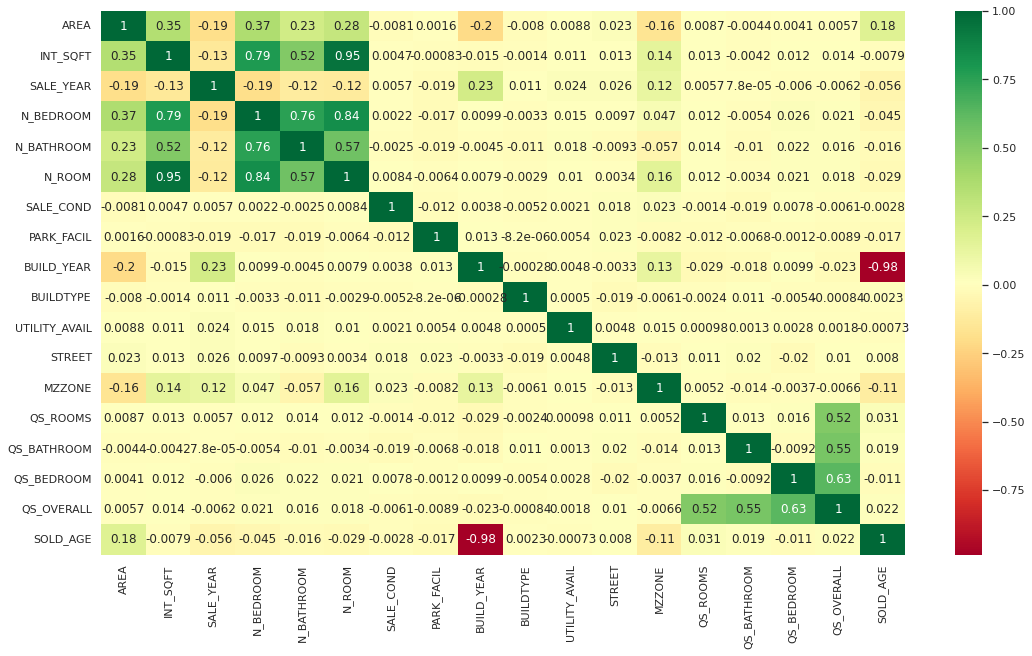

In [ ]:
plt.figure(figsize=(18,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True,cmap='RdYlGn')
plt.show()


In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are use absolute() to even focus on -ve coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
#checking the heightly correlated feature 

corr_features = correlation(X_train, 0.8)
len(set(corr_features))
print('This column are highly correlated with another column:',corr_features)

This column are highly correlated with another column: {'N_ROOM', 'SOLD_AGE'}


In [ ]:
#preparing the data for cross validation 
cwf_train=X_train.drop(corr_features,axis=1)
cwf_test=X_test.drop(corr_features,axis=1)

In [ ]:
cwf_train.shape

(5687, 16)

In [ ]:
cwf_test.shape

(1422, 16)

In [ ]:
#splitting the train and test data from cross validation split

train = pd.concat([cwf_train,y_train],axis=1)
test = pd.concat([cwf_test,y_test],axis=1)

In [ ]:
new_df=pd.concat([train,test],axis=0)
new_df.shape
print("PREVIOUSLY THE NO. OF FEATURE IS:",df.shape)
print("NOW THE NO. OF FEATURE IS:",new_df.shape)
print("{} FEATURE IS BEEN REDUCED AFTER CORRELATION WITHIN INDEPENDENT FEATURES INCLUDING INF_PRICE".format(df.shape[1]-new_df.shape[1]))

PREVIOUSLY THE NO. OF FEATURE IS: (7109, 20)
NOW THE NO. OF FEATURE IS: (7109, 17)
3 FEATURE IS BEEN REDUCED AFTER CORRELATION WITHIN INDEPENDENT FEATURES INCLUDING INF_PRICE


,AREA,INT_SQFT,SALE_YEAR,N_BEDROOM,N_BATHROOM,SALE_COND,PARK_FACIL,BUILD_YEAR,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
SALES_PRICE,-0.019138,0.612125,0.000906,0.330987,0.108834,-0.030732,0.146428,0.116043,-0.436276,-0.023812,-0.042652,0.427789,0.021967,-0.011377,0.018804,0.020485,1.0


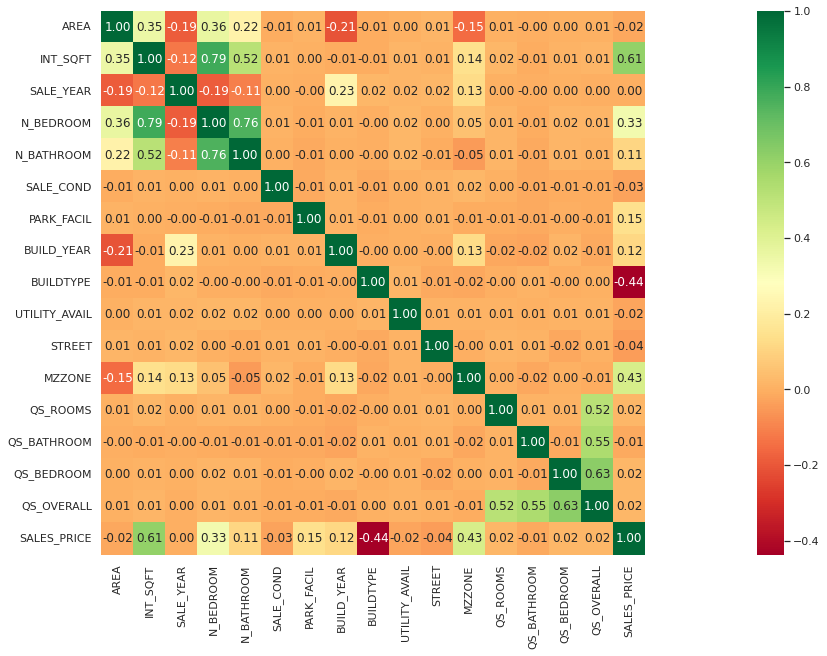

In [ ]:
corrmat = new_df.corr()
plt.figure(figsize=(40, 10))
sns.heatmap(corrmat, cbar=True, fmt='.2f', annot=True, cmap='RdYlGn', square=True)
i=pd.DataFrame(new_df[new_df.columns[:]].corr()['SALES_PRICE'][:]).T
i=i.iloc[0]
pd.DataFrame(i).T

## MACHINE LEARNING ALGORITHMS

In [ ]:
X=new_df.drop(['SALES_PRICE'],axis=1)
y=new_df['SALES_PRICE']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5687, 16), (1422, 16), (5687,), (1422,))

In [ ]:
scaler=StandardScaler()
minmax=MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# MODELS DEFINE

In [ ]:
#linear model 
lr_model=LinearRegression()

#XGBRegressor model
xg_model= xg.XGBRegressor(colsample_bytree=0.4,
                 gamma=2,                 
                 learning_rate=0.01,
                 max_depth=4,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                ) 

#random forest model
rf = RandomForestRegressor(n_estimators= 1000, max_depth = 4, max_features='sqrt')
dt=DecisionTreeRegressor(max_depth= 10)

## CROSS VALIDATION SCROES FOR ALL THE MODELS


In [ ]:
# #linear model
CV_Linear_regression = cross_val_score(lr_model,X_train_scaled,y_train,cv=10).mean()

# #XGBoost Regressor model
CV_XG_Boost = cross_val_score(xg_model,X_train_scaled,y_train,cv=10).mean()

#Randomforest model
CV_RandomForest = cross_val_score(rf,X_train_scaled,y_train,cv=10).mean()

#Decision tree model
CV_DecisionTree = cross_val_score(dt,X_train_scaled,y_train,cv=10).mean()


[09:11:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:11:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:12:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:12:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:13:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:13:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:14:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:14:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:

print("The cross_validation score of an Linear_Regression model is:",CV_Linear_regression)
print("The cross_validation score of an XG_Boost model is:",CV_XG_Boost)
print("The cross_validation score of an Random_Forest model is:",CV_RandomForest)
print("The cross_validation score of an Decision_Tree model is:",CV_DecisionTree)

The cross_validation score of an Linear_Regression model is: 0.7785710952245966
The cross_validation score of an XG_Boost model is: 0.9989322799985537
The cross_validation score of an Random_Forest model is: 0.7975591316085625
The cross_validation score of an Decision_Tree model is: 0.9575470029190786


Based on the above results of cross validation "XGBOOST REGRESSOR" is giving the best results

# MODEL -1 (Linear Regression)

In [ ]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()

In [ ]:
#model fit
lr_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
lr_y_pred=lr_model.predict(X_test)

In [ ]:
print(r2_score(y_test,lr_y_pred))

0.7769504638827779


## MODEL -2 (XGBoost Regression)

In [ ]:
xg_model= xg.XGBRegressor(colsample_bytree=0.4,
                 gamma=2,                 
                 learning_rate=0.01,
                 max_depth=4,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                )

In [ ]:
xg_model.fit(X_train_scaled,y_train)

[09:17:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.4, gamma=2, learning_rate=0.01, max_depth=4,
             min_child_weight=1.5, n_estimators=10000)

In [ ]:
xg_y_pred=xg_model.predict(X_test_scaled)

In [ ]:
print("XGBoost model Rsquared metric:",r2_score(y_test,xg_y_pred))

XGBoost model Rsquared metric: 0.9991099961430963


## MODEL - 3 (Random Forest)

In [ ]:
rf = RandomForestRegressor(n_estimators= 1000, max_depth = 4, max_features='sqrt')

# Train the model on training data
rf.fit(X_train, y_train);

# Use the forest's predict method on the test data
rf_pred = rf.predict(X_test)

In [ ]:
print("Random forest Regressor model Rsquared metric",r2_score(y_test,rf_pred))

Random forest Regressor model Rsquared metric 0.8014694392737651


## MODEL - 4 (Decision Tree)

In [ ]:
dt= DecisionTreeRegressor(max_depth= 10)
dt.fit(X_train, y_train)
dt_pred= dt.predict(X_test)


In [ ]:
print("Deciosion Tree model Rsquared metric",r2_score(y_test,dt_pred))

Deciosion Tree model Rsquared metric 0.9591233697662156


## ENSEMBLE TECHNIQUE

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xg

model1 = LinearRegression()
model2 = RandomForestRegressor(random_state=1)
model3 = GradientBoostingRegressor(random_state=1)
model4 = DecisionTreeRegressor(random_state=1)
model5 = xg.XGBRegressor(random_state=1) 

model = VotingRegressor(estimators=[('Linear_Regg', model1), ('Random_Forest', model2), ('Gradient_Boosting', model3),('Decision_Tree', model4),
                        ('XG_Boosting', model5)])

model.fit(X_train,y_train)

et_y_pred=model.predict(X_test)

print("Ensemble Technique Rsquared metric",r2_score(y_test,et_y_pred))

[09:26:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Ensemble Technique Rsquared metric 0.9748021047991982


# BEST MODEL

In [ ]:
print("XGBoost model Rsquared metric:",r2_score(y_test,xg_y_pred))
print("Ensemble Technique Rsquared metric:",r2_score(y_test,et_y_pred))
print("Random forest Regressor model Rsquared metric:",r2_score(y_test,rf_pred))
print("Linear Regg model Rsquared metric:",r2_score(y_test,lr_y_pred))
print("DecisionTree Rsquared metric:",r2_score(y_test,dt_pred))

XGBoost model Rsquared metric: 0.9991099961430963
Ensemble Technique Rsquared metric: 0.9748021047991982
Random forest Regressor model Rsquared metric: 0.8014694392737651
Linear Regg model Rsquared metric: 0.7769504638827779
DecisionTree Rsquared metric: 0.9591233697662156


My XGBoost model give me the high accuracy which is close to 1..
Followed by Ensemble Technique,DecisionTree, RandomForest Regressor and Linear Regression

# SUGGESTION TO BUYERS AND REAL ESTATE AGENTS.

If an agent wants to build some type of building in Chennai. I  suggest him to build a "commercial" building. In terms of location, the "average selling price" of "T Nagar" is higher than in other regions, so I recommend "T Nagar" as his first choice. Suggest to the agent to build with "parking lot" and "All_Utility". Gravel roads bring more money than paved roads. We strongly recommend that you do not build types of buildings that are inaccessible to the building.

# QUESTIONS TO BUYERS

Before answering them. I would like to ask them whether they have any expections/wishes regarding the build type,location, price,...utility?
**ANSWER OF BUYERS**
He wants to buy a "HOUSE" building with all amenities.

---




**ANSWER TO BUYERS**
I would let him know that the average sales_price of "house" building is lesser than "Others" & "Commercial" type buildings. When it comes to the location i would suggest my buyer to buy in Karapakam, because the price of price and also it is near to the beach.
Minmum price = 26,40,250.00
Average price = 62,66,439.00
Maximum price = 99,66,750.00 The Maximum price of "House" building in karapakkam is 9966750.00(Ninty nine lakhs sixty six thousand seven fifty) and the average price is 62,66,439.00(sixty two lakhs sixty six thousand four hundred and thirty nine). Since the buyer need with all amenity, he/she can negotiate the price between (90,00,000 - 95,00,000).

